# Import the libraries 


In [309]:
import numpy as np 
import matplotlib.pyplot as plt

In [310]:
def load_maze(maze_file):
    maze = []
    with open(maze_file, 'r') as f:
        for line in f:
            maze.append(line.strip())
    
        rows = len(maze[0])
        cols = len(maze)-1

        return maze, rows, cols

### We load the maze2.txt


In [311]:
maze, rows, cols = load_maze('Mazes/maze2.txt')

In [312]:
# Generate coordinates for the maze
def generate_coordinates(maze,rows, cols):
    maze_dict = {}
    for i in range(cols):
        for j in range(rows):
            maze_dict[(i,j)] = maze[i][j]
    return maze_dict

In [313]:

maze_dict = generate_coordinates(maze,rows, cols)

In [314]:
# Generate the maze image
def generate_maze_image(maze_dict):
    
    max_row = max(maze_dict.keys(), key = lambda x: x[0])[0]+1
    max_col = max(maze_dict.keys(), key = lambda x: x[1])[1]+1

    image = np.zeros((max_row, max_col, 3), dtype = np.uint8)

    colors = {'#': [0,0,0], ' ': [255,255,255], 'S': [0,255,0], 'E': [255,0,0]}

    for (row,col), state in maze_dict.items():
        color = colors.get(state, [255,255,255])
        image[row, col] = color

    plt.imshow(image)
    plt.axis('off')
    plt.title('Maze Visualization')
    plt.show()


## Create the image of the maze2.txt

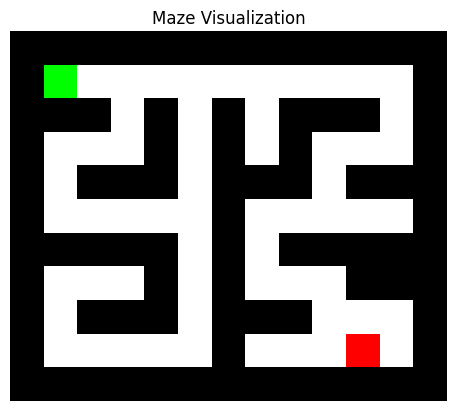

In [315]:
generate_maze_image(maze_dict)

In [331]:
class Agent:
    def __init__(self, maze_dict):
        self.maze_dict = maze_dict
        self.current_position = self.get_position('S')
        self.end_position = self.get_position('E')
    
    def get_position(self, state):
        for position, value in self.maze_dict.items():
            if value == state:
                return position
    
    def get_possible_moves(self, position):
        x, y = position
        moves = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
        valid_moves = []
        for move in moves:
            if self.maze_dict.get(tuple(move)) != '#':
                valid_moves.append(move)
        return valid_moves
     
    def bfs(self):
        visited = []
        queue = [[self.current_position]]
        while queue:
            path = queue.pop(0)
            node = path[-1]
            if node not in visited:
                for move in self.get_possible_moves(node):
                    new_path = list(path)
                    new_path.append(move)
                    queue.append(new_path)
                    if move == self.end_position:
                        return new_path
                visited.append(node)


In [332]:
agent1 = Agent(maze_dict)
path = agent1.bfs()
path.remove(path[0])
path.remove(path[-1])


In [333]:
# Visualize the path

def Visualize_path(path, maze_dict):
    max_row = max(maze_dict.keys(), key = lambda x: x[0])[0]+1
    max_col = max(maze_dict.keys(), key = lambda x: x[1])[1]+1

    image = np.zeros((max_row, max_col, 3), dtype = np.uint8)

    colors = {'#': [0,0,0], ' ': [255,255,255], 'S': [0,255,0], 'E': [255,0,0], 'X': [0,0,255]}

    for (row,col), state in maze_dict.items():
        color = colors.get(state, [255,255,255])
        image[row, col] = color

    
    for position in path:
        image[position] = colors['X']

    plt.imshow(image)
    plt.axis('off')
    plt.title('Maze Visualization')
    plt.show()
    


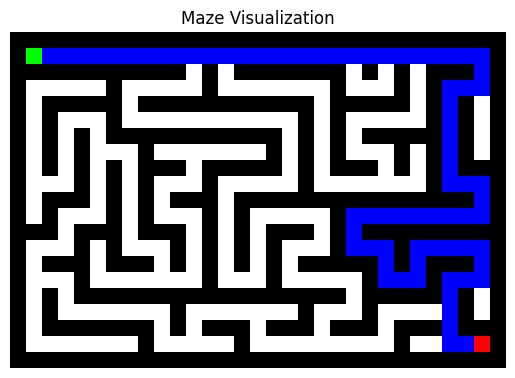

In [334]:
Visualize_path(path, maze_dict)

## We load maze3.txt


In [335]:
maze, rows, cols = load_maze('Mazes/maze3.txt')
cols = cols+1
maze_dict = generate_coordinates(maze,rows, cols)
agent2 = Agent(maze_dict)
path = agent2.bfs()

path.remove(path[0])
path.remove(path[-1])

print(path)


[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (2, 29), (3, 29), (3, 28), (3, 27), (4, 27), (5, 27), (6, 27), (7, 27), (8, 27), (9, 27), (9, 28), (9, 29), (10, 29), (11, 29), (11, 28), (11, 27), (11, 26), (11, 25), (11, 24), (11, 23), (11, 22), (11, 21), (12, 21), (13, 21), (13, 22), (13, 23), (14, 23), (15, 23), (15, 24), (15, 25), (14, 25), (13, 25), (13, 26), (13, 27), (13, 28), (13, 29), (14, 29), (15, 29), (15, 28), (15, 27), (16, 27), (17, 27), (18, 27), (19, 27), (19, 28)]


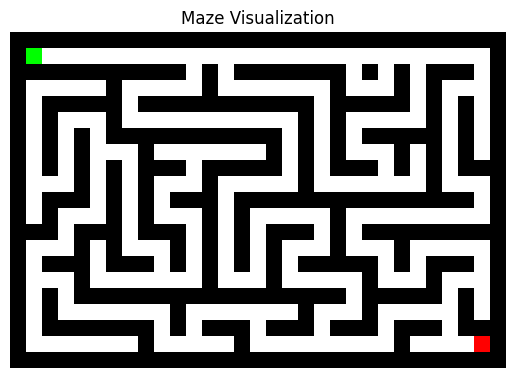

In [336]:
generate_maze_image(maze_dict)

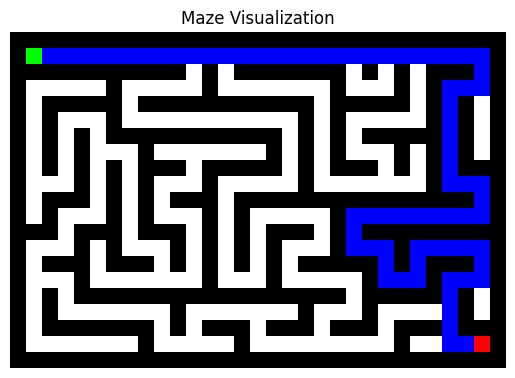

In [330]:
Visualize_path(path, maze_dict)